In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('BlackFriday.csv')
print(df.shape)

(53629, 12)


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Product также может относиться к другой категории

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53629 entries, 0 to 53628
Data columns (total 12 columns):
User_ID                       53629 non-null int64
Product_ID                    53629 non-null object
Gender                        53629 non-null object
Age                           53629 non-null object
Occupation                    53629 non-null int64
City_Category                 53629 non-null object
Stay_In_Current_City_Years    53629 non-null object
Marital_Status                53629 non-null int64
Product_Category_1            53629 non-null int64
Product_Category_2            36792 non-null float64
Product_Category_3            16310 non-null float64
Purchase                      53629 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 4.9+ MB


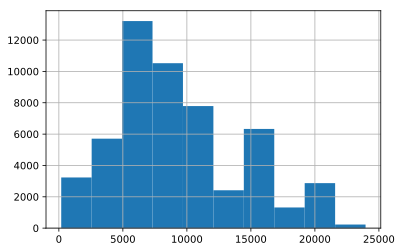

In [5]:
# Сначала посмотрим распределения Покупок(Purchase), тип переменной: число(int)

df['Purchase'].hist()

In [17]:
#Определяем топ 10 покупателей, тип переменных: число(int), показываем в виде таблицы, таблицы отсортируем по купленному кол-ву
#товаров

top_buyers = df.groupby('User_ID')['Purchase'].agg([sum, len])\
    .sort_values('len', ascending=False).head(10)
    
top_buyers

,sum,len
User_ID,,
1000889,963939,137
1001680,1221394,135
1001941,973026,133
1001181,884138,133
1001980,917769,112
1000424,902832,108
1001150,613067,107
1001449,752117,105
1001015,843827,101


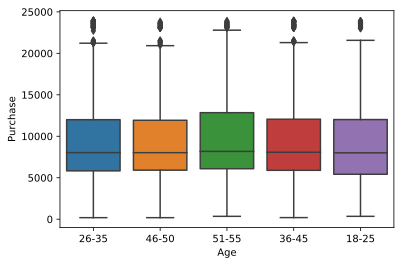

In [19]:
#посмотрим сравнения покупок по возрасту покупателей

buyers_by_age = df.Age.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="Age", y="Purchase", 
            data=df[df.Age.isin(buyers_by_age)])

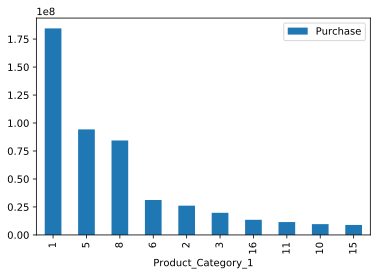

In [20]:
#Определяем наибольшую продаваемую категорию продуктов

top_sold_category = df.groupby('Product_Category_1')[['Purchase']].sum()\
    .sort_values('Purchase', ascending=False).head(10)
    
top_sold_category.plot(kind='bar')

In [25]:
#Теперь определяем наибольше продаваемый топ 10 продуктов


frequent_product = df.groupby('Product_ID')[['Purchase']].sum()\
    .sort_values('Purchase', ascending=False).head(10)
    
frequent_product

,Purchase
Product_ID,
P00025442,2940240
P00112142,2521391
P00059442,2508069
P00110942,2389208
P00110742,2385225
P00184942,2299283
P00255842,2290496
P00237542,2214043
P00046742,2112659


In [21]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [22]:
df['Product_Category_1'] = df.Product_Category_1.astype('object')

In [23]:
#Теперь сравним покупки по категориям продуктов

data = []

for product in df.Product_Category_1.unique():
    data.append(
        go.Box(y=df[df.Product_Category_1==product].Purchase, 
               name=product)
    )
iplot(data, show_link = False)

In [15]:
#Здесь мы посмотрим как влияют годы проживания в городе на покупки

df1 = df[['Stay_In_Current_City_Years'] + ['Purchase']].groupby('Stay_In_Current_City_Years').sum()
df1

,Purchase
Stay_In_Current_City_Years,
0,67281480
1,173462298
2,90500903
3,86980701
4+,79217644


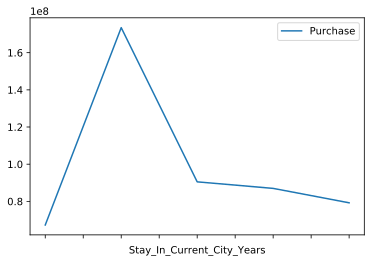

In [16]:
df1.plot()

In [30]:
G_df = df[['Gender']+['Purchase']].groupby('Gender').sum()
G_df

,Purchase
Gender,
F,114454707
M,382988319


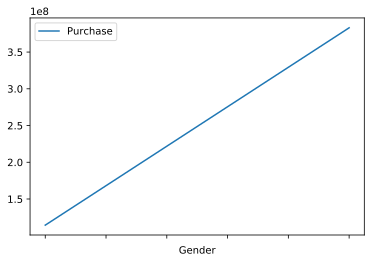

In [31]:
G_df.plot()